<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_11_07_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 8. 텍스트 분석**
---

### **07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**
---

#### **1. 개념**
- 비슷한 텍스트 구성의 문서를 군집화하는 것
- 동일한 군집에 속하는 문서를 같은 가테고리 소속으로 분류하므로 텍스트 분류 기반의 문서 분류와 유사함
- 하지만 텍스트 분류 기반의 문서 분류와는 달리 **학습 데이터 세트가 필요 없는 비지도 학습 기반으로 동작함**

#### **2. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

In [3]:
import pandas as pd
import glob, os

##### **1) Data Loading**

In [4]:
path = r'/content/drive/MyDrive/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path,'*.data'))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합
# 개별 파일의 파일 내용은 데이터프레임 로딩 후 다시 string으로 변환해 opinion_text로 취합

for file_ in all_files:
  # 개인 파일 읽어서 데이터프레임 생성하기
  df = pd.read_table(file_,index_col=None, header=0, encoding='latin1')

  # 절대 경로로 주어진 파일명 가공하고 맨 마지막 .data 확장자도 제거하기
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]

  # 파일명 list와 파일 내용 list에 파일명과 내용 추가하기
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명과 내용 list 객체를 데이터프레임으로 생성하기
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})
document_df.head()

,filename,opinion_text
0,directions_garmin_nuvi_255W_gps,...
1,comfort_toyota_camry_2007,...
2,comfort_honda_accord_2008,...
3,buttons_amazon_kindle,...
4,battery-life_amazon_kindle,...


##### **2) TF-IDF (피처 벡터화)**

In [5]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    text_new = text.lower().translate(remove_punct_dict)
    word_tokens = nltk.word_tokenize(text_new)
    
    return LemTokens(word_tokens)

In [6]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',ngram_range=(1,2),
                             min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


##### **3) Clustering**

In [8]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행하기
km_cluster = KMeans(n_clusters=5,max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,directions_garmin_nuvi_255W_gps,...,1
1,comfort_toyota_camry_2007,...,3
2,comfort_honda_accord_2008,...,3
3,buttons_amazon_kindle,...,1
4,battery-life_amazon_kindle,...,2


In [9]:
document_df[document_df['cluster_label']==0].sort_values(by='filename') # 호텔 

,filename,opinion_text,cluster_label
8,bathroom_bestwestern_hotel_sfo,...,0
35,food_holiday_inn_london,...,0
32,food_swissotel_chicago,...,0
31,free_bestwestern_hotel_sfo,...,0
22,parking_bestwestern_hotel_sfo,...,0
17,room_holiday_inn_london,...,0
11,rooms_bestwestern_hotel_sfo,...,0
13,rooms_swissotel_chicago,...,0
9,service_bestwestern_hotel_sfo,...,0
14,service_holiday_inn_london,...,0


In [10]:
document_df[document_df['cluster_label']==1].sort_values(by='filename') # 포터블 전자기기

,filename,opinion_text,cluster_label
6,accuracy_garmin_nuvi_255W_gps,...,1
3,buttons_amazon_kindle,...,1
0,directions_garmin_nuvi_255W_gps,...,1
38,display_garmin_nuvi_255W_gps,...,1
33,eyesight-issues_amazon_kindle,...,1
34,features_windows7,...,1
36,fonts_amazon_kindle,...,1
28,keyboard_netbook_1005ha,...,1
23,navigation_amazon_kindle,...,1
50,screen_garmin_nuvi_255W_gps,...,1


In [11]:
document_df[document_df['cluster_label']==2].sort_values(by='filename') # 차량

,filename,opinion_text,cluster_label
4,battery-life_amazon_kindle,...,2
7,battery-life_ipod_nano_8gb,...,2
5,battery-life_netbook_1005ha,...,2
26,performance_netbook_1005ha,...,2
47,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2


In [12]:
document_df[document_df['cluster_label']==3].sort_values(by='filename') # 차량

,filename,opinion_text,cluster_label
2,comfort_honda_accord_2008,...,3
1,comfort_toyota_camry_2007,...,3
29,gas_mileage_toyota_camry_2007,...,3
30,interior_honda_accord_2008,...,3
37,interior_toyota_camry_2007,...,3
25,mileage_honda_accord_2008,...,3
27,performance_honda_accord_2008,...,3
18,quality_toyota_camry_2007,...,3
12,satellite_garmin_nuvi_255W_gps,...,3
15,seats_honda_accord_2008,...,3


In [13]:
document_df[document_df['cluster_label']==4].sort_values(by='filename') # 호텔

,filename,opinion_text,cluster_label
24,location_bestwestern_hotel_sfo,...,4
19,location_holiday_inn_london,...,4
20,price_amazon_kindle,...,4
21,price_holiday_inn_london,...,4


- **군집화 개수를 5->3개로 줄여서 다시 군집화하기**

In [14]:
km_cluster = KMeans(n_clusters=3,max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,directions_garmin_nuvi_255W_gps,...,0
1,comfort_toyota_camry_2007,...,2
2,comfort_honda_accord_2008,...,2
3,buttons_amazon_kindle,...,0
4,battery-life_amazon_kindle,...,0


In [15]:
document_df[document_df['cluster_label']==0].sort_values(by='filename') # 포터블 전자기기

,filename,opinion_text,cluster_label
6,accuracy_garmin_nuvi_255W_gps,...,0
4,battery-life_amazon_kindle,...,0
7,battery-life_ipod_nano_8gb,...,0
5,battery-life_netbook_1005ha,...,0
3,buttons_amazon_kindle,...,0
0,directions_garmin_nuvi_255W_gps,...,0
38,display_garmin_nuvi_255W_gps,...,0
33,eyesight-issues_amazon_kindle,...,0
34,features_windows7,...,0
36,fonts_amazon_kindle,...,0


In [16]:
document_df[document_df['cluster_label']==1].sort_values(by='filename') # 포터블 전자기기

,filename,opinion_text,cluster_label
8,bathroom_bestwestern_hotel_sfo,...,1
35,food_holiday_inn_london,...,1
32,food_swissotel_chicago,...,1
31,free_bestwestern_hotel_sfo,...,1
24,location_bestwestern_hotel_sfo,...,1
19,location_holiday_inn_london,...,1
22,parking_bestwestern_hotel_sfo,...,1
21,price_holiday_inn_london,...,1
17,room_holiday_inn_london,...,1
11,rooms_bestwestern_hotel_sfo,...,1


In [17]:
document_df[document_df['cluster_label']==2].sort_values(by='filename') # 포터블 전자기기

,filename,opinion_text,cluster_label
2,comfort_honda_accord_2008,...,2
1,comfort_toyota_camry_2007,...,2
29,gas_mileage_toyota_camry_2007,...,2
30,interior_honda_accord_2008,...,2
37,interior_toyota_camry_2007,...,2
25,mileage_honda_accord_2008,...,2
27,performance_honda_accord_2008,...,2
18,quality_toyota_camry_2007,...,2
15,seats_honda_accord_2008,...,2
45,transmission_toyota_camry_2007,...,2


#### **3. 군집별 핵심 단어 추출하기**

In [18]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape:  (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


- **분석**
  - 군집 3개, word 피처가 4611개로 구성되어 있음
  - 각 행의 배열 값은 개별 중심으로부터 얼마나 가까운지 나타냄 (1에 가까울수록 중심과 가까움)

- **argsort()[:,::-1]:** 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환함
  - 인덱스가 필요한 이유: 핵심 단어 피처의 이름을 출력하기 위함

In [19]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명 반환하는 함수

def get_cluster_details(cluster_model,cluster_data,feature_names,clusters_num,top_n_features=10):
  cluster_details= {}

  # cluster centers array 값이 큰 순으로 정렬된 인덱스 값 반환하기
  # 군집 중심점별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

  # 개별 군집별로 반복하면서 위의 파라미터 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화하기
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # 위에서 구한 인덱스를 이용해 top n 피처 단어 구하기
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [ feature_names[ind] for ind in top_feature_indexes]

    # 피처 단어의 중심 위치 상대값 구하기
    top_features_values = cluster_model.cluster_centers_[cluster_num,top_feature_indexes].tolist()

    # cluster details 딕셔너리에 개별 군집별 핵심 단어, 중심위치 상대값, 해당 파일명 입력하기
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_features_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames
  
  return cluster_details

In [20]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('###### Cluster {0}'.format(cluster_num))
    print('Top features: ', cluster_detail['top_features'])
    print('Reviews 파일명: ',cluster_detail['filenames'][:7])
    print('==============================================')

In [21]:
feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km_cluster,cluster_data=document_df,
                                      feature_names=feature_names,clusters_num=3,top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features:  ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명:  ['directions_garmin_nuvi_255W_gps', 'buttons_amazon_kindle', 'battery-life_amazon_kindle', 'battery-life_netbook_1005ha', 'accuracy_garmin_nuvi_255W_gps', 'battery-life_ipod_nano_8gb', 'satellite_garmin_nuvi_255W_gps']
###### Cluster 1
Top features:  ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명:  ['bathroom_bestwestern_hotel_sfo', 'service_bestwestern_hotel_sfo', 'service_swissotel_hotel_chicago', 'rooms_bestwestern_hotel_sfo', 'rooms_swissotel_chicago', 'service_holiday_inn_london', 'room_holiday_inn_london']
###### Cluster 2
Top features:  ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명:  ['comfort_toyota_camry_2007', 'comfort_honda_accord_2008', 'seats_honda_accord_2008', 'quality_toyota

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge**
---

- **개요**
  - 일본의 대형 온라인 쇼핑몰 Mercari사의 제품에 대해 가격을 예측하는 과제
  - price: target
  - item_description: 텍스트 형태의 비정형 데이터 -> 다른 정형 속성과 같이 적용해야함

#### **1. 데이터 전처리**

In [22]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

##### **1) 데이터 확인하기**

In [23]:
mercari_df = pd.read_csv('/content/drive/MyDrive/mercari_train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


##### **2) null값 확인하기**

In [24]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


##### **3) price (Target) 분포도 확인하기**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


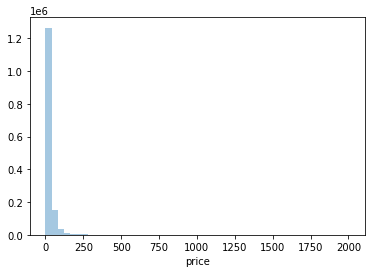

In [26]:
y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

- **분석**: target 값인 price분포가 왜곡돼 있으므로 로그값으로 변환해야함

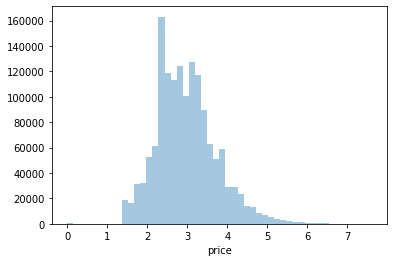

In [27]:
import numpy as np
y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)

In [28]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

##### **4) feature 값 살펴보기**

In [29]:
print('Shipping 값 유형: \n',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형: \n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형: 
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형: 
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [30]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

- **분석**: No description yet도 null값처럼 의미 없는 속성이므로 적절한 값으로 대체해야함

- **category_name**: / 기준으로 단어 토큰화하여 별도의 피처로 저장

In [31]:
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null','Other_Null','Other_Null']

mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

print('대분류 유형: \n', mercari_df['cat_dae'].value_counts())
print('중분류 개수: \n', mercari_df['cat_jung'].nunique())
print('소분류 개수: \n', mercari_df['cat_so'].nunique())

대분류 유형: 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수: 
 114
소분류 개수: 
 871


- brand_name, category_name, item_description의 null값: **Other Null로 동일하게 변경하기**

In [32]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

In [33]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

#### **2. 피처 인코딩과 피처 벡터화**

- **개요**
  - 문자열 컬럼: 레이블 인코딩 / 원핫인코딩 / 피처 벡터화
  - 선형 회귀: 원핫 인코딩
  - 벡터화: short -> Count / long -> TD-IDF

##### **1) brand name**

In [34]:
print('brand name 유형 건수: ', mercari_df['brand_name'].nunique())
print('brand name sample 5건:\n', mercari_df['brand_name'].value_counts()[:5])

brand name 유형 건수:  4810
brand name sample 5건:
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


- **분석**
  - 대부분 명료한 문자열로 구성됨
  - 별도의 **피처 벡터화 필요 없음**
  - **원핫 인코딩**

##### **2) name**

In [35]:
print('name 종류 개수:', mercari_df['name'].nunique())
print('name sample 10건: \n', mercari_df['name'][:10])

name 종류 개수: 1225273
name sample 10건: 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


- **분석**
  - 대부분의 상품이 고유한 상품명 가지고 있음
  - 유형이 많고 적은 단어 위주이므로 **Count 기반 벡터화** 변환

In [36]:
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)
print('name vectorization shape:',X_name.shape)

name vectorization shape: (1482535, 105757)


##### **3) category name**
- 원핫 인코딩

##### **4) shipping**
- 원핫 인코딩

##### **5) item condition id**
- 원핫 인코딩

##### **6) item description**

In [37]:
pd.set_option('max_colwidth',200)
print('item description 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())
mercari_df['item_description'][:2]

item description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

- 분석
  - 평균 문자열: 145자
  - **TF-IDF 벡처화 변환**

In [38]:
tfidf_descp = TfidfVectorizer(max_features=50000,ngram_range=(1,3),stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df.item_description)
print('item description vectorization shape:',X_descp.shape)

item description vectorization shape: (1482535, 50000)


##### **7) 피처 벡터화**

- 벡터화를 통해 학습한 데이터는 희소 행렬 형태
- 희소 행렬 객체 변수는 새로 결합해 새로운 데이터 세트로 구성해야함
- **LabelBinarizer:** 희소 행렬 형태의 원핫 인코딩 변환 지원함
  - **`sparse_out = True`**

- **hstack():** 희소 행렬을 쉽게 칼럼 레벨로 결합하게 함

In [39]:
from sklearn.preprocessing import LabelBinarizer

# brand name, item condition id, shipping 원핫 인코딩 변환하기
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df.brand_name)

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df.item_condition_id)

lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df.shipping)

# item description 대,중,소 원핫 인코딩 변환하기
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df.cat_dae)

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df.cat_jung)

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df.cat_so)

In [40]:
print(type(X_brand),type(X_item_cond_id),type(X_shipping))
print('X_brand shape: {0}, X_item_cond_id shape: {1}'.format(X_brand.shape,X_item_cond_id.shape))
print('X_shipping shape: {0}, X_cat_dae shape: {1}'.format(X_shipping.shape,X_cat_dae.shape))
print('lb_cat_jung shape: {0}, X_cat_so shape: {1}'.format(X_cat_jung.shape,X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape: (1482535, 4810), X_item_cond_id shape: (1482535, 5)
X_shipping shape: (1482535, 1), X_cat_dae shape: (1482535, 11)
lb_cat_jung shape: (1482535, 114), X_cat_so shape: (1482535, 871)


In [41]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp,X_brand,X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse),X_features_sparse.shape)

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


In [42]:
del X_features_sparse
gc.collect()

22

#### **3. 릿지 회귀 모델 구축 및 평가**

In [43]:
def rmsle(y,y_pred):
  return np.sqrt(np.mean(np.power(np.log1p(y)- np.log1p(y_pred),2)))

def evaluate_org_price(y_test,preds):
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  rmsle_result = rmsle(y_test_exmpm,preds_exmpm)
  return rmsle_result

In [44]:
def model_train_predict(model, matrix_list):
  X = hstack(matrix_list).tocsr()

  X_train,X_test,y_train,y_test = train_test_split(X,mercari_df['price'],test_size=0.2,random_state=156)
  model.fit(X_train,y_train)
  preds = model.predict(X_test)

  del X, X_train, X_test, y_train
  gc.collect()

  return preds,y_test

In [45]:
linear_model = Ridge(solver='lsqr',fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값 : ',evaluate_org_price(y_test,linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값 : ',evaluate_org_price(y_test,linear_preds))

Item Description을 제외했을 때 rmsle 값 :  0.5023727038010556
Item Description을 포함한 rmsle 값 :  0.47121951434336345


- **결과**: item description을 포함했을 때 rmsle 값이 감소함

#### **4. LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가**

In [46]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
lgbm_model = LGBMRegressor(n_estimators=200,learning_rate=0.5,num_leaves=125,random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model,matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test,lgbm_preds))

LightGBM rmsle 값: 0.4571958024426099


In [47]:
preds = lgbm_preds*0.45 + linear_preds*0.55
print('최종 rmsle 값:', evaluate_org_price(y_test,preds))

최종 rmsle 값: 0.45072592143293
